In [1]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [2]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [3]:
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


# Question 1 

## What is the overall distance travelled for each of the rides? What are the average speeds etc. Provide a summary for each ride.

In [4]:
def ride_Summary (df, label): 
    print ("Summary of : ",label)
    print ("Overall distance for ", label, ":" , df.distance.sum(), "km")
    print ("Average speed for ", label, ":" , df.speed.mean(), "km/h")
    print ("Maximum speed for ", label, ":" , df.speed.max(), "km/h")
    distance_sum = df.distance.sum() 
    avg_speed = df.speed.mean()
    print ("Time taken for ", label, ":" , distance_sum/avg_speed, "hours")
    print ("Average cadence for ", label, ":" , df.cadence.mean())
    print ("Maximum heart rate for ", label, ":" , df.hr.max(), "bpm")
    print ("\n")

In [5]:
ride_Summary(rr_2016, "Road Race 2016")
ride_Summary(tt_2016, "Time Trial 2016")
ride_Summary(rr_2019, "Road Race 2019")
ride_Summary(tt_2019, "Time Trial 2019")

Summary of :  Road Race 2016
Overall distance for  Road Race 2016 : 49.04858574628638 km
Average speed for  Road Race 2016 : 34.93308475482947 km/h
Maximum speed for  Road Race 2016 : 92.74903649913952 km/h
Time taken for  Road Race 2016 : 1.404072560168207 hours
Average cadence for  Road Race 2016 : 65.98795180722891
Maximum heart rate for  Road Race 2016 : 205.0 bpm


Summary of :  Time Trial 2016
Overall distance for  Time Trial 2016 : 24.80288703130808 km
Average speed for  Time Trial 2016 : 33.52996304869014 km/h
Maximum speed for  Time Trial 2016 : 162.50576377606754 km/h
Time taken for  Time Trial 2016 : 0.7397230648686031 hours
Average cadence for  Time Trial 2016 : 83.27709279688514
Maximum heart rate for  Time Trial 2016 : 251.0 bpm


Summary of :  Road Race 2019
Overall distance for  Road Race 2019 : 51.7891325359606 km
Average speed for  Road Race 2019 : 33.87986137188044 km/h
Maximum speed for  Road Race 2019 : 70.37046868335639 km/h
Time taken for  Road Race 2019 : 1.5286

# NOTES ON FINDINGS 

It can be seen that the 2016 Road Race had the largest distance travelled with 49km as compared to the 2019 Time Trial where only 24km were travelled. The maximum heart rate decreases from the 200 bpm range in 2016 to the 170 bpm range in 2019.Although the average speeds for each race are generally around the same speed of 33km/h, there is an outlier in the data set. 

2016 Time Trial maximum speed:  162.50576377606754
2016 Road Race maximum speed:  92.74903649913952
2019 Time Trial maximum speed:  63.300734121945005
2019 Road Race maximum speed:  70.37046868335639


<AxesSubplot:xlabel='Distance', ylabel='Speed'>

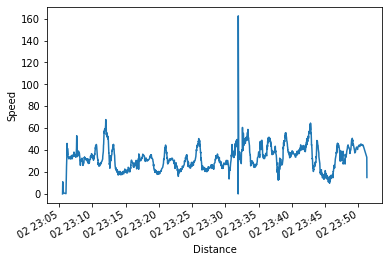

In [6]:
print ("2016 Time Trial maximum speed: ", tt_2016.speed.max())
print ("2016 Road Race maximum speed: ", rr_2016.speed.max())
print ("2019 Time Trial maximum speed: ", tt_2019.speed.max())
print ("2019 Road Race maximum speed: ", rr_2019.speed.max())

tt_2016.speed.plot(kind = "line", x = "distance", y = "speed", xlabel = "Distance", ylabel = "Speed", label = "2016 Time Trial")

In [7]:
tt_2016.shape

(1541, 11)

## DEALING WITH OUTLIERS 

A clear outlier can be seen in the plot where the speed reaches 160km/h. An outlier like this could skew the results of the dataset. As this dataset is large, there should not be any issue with dropping this outlier rather than altering it's value. However, there are also outliers towards the bottom of the graph, where the speed hits 0km/h. However, this is more likely than reaching 160km/h as the rider may have rested during this time, as such these values will not be altered.

In [8]:
tt_2016_clean = tt_2016[tt_2016.speed < 160]

<AxesSubplot:xlabel='Distance', ylabel='Speed'>

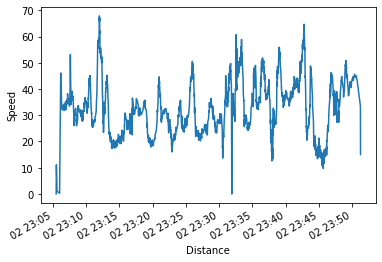

In [9]:
tt_2016_clean.speed.plot(kind = "line", x = "distance", y = "speed", xlabel = "Distance", ylabel = "Speed", label = "2016 Time Trial")

## IMPACT OF OUTLIERS 

Now that the outlier has been removed, we can determine if cleaning the dataset had any impact on the results. As seen below, the average speed was not majorly impacted. The average speed decreased from 33.529km/h to 33.446km/h. However, now that the outlier has been removed, it can be seen that the maximum speed for the 2016 Time Trial is 67km/h/

In [10]:
ride_Summary(tt_2016, "Time Trial 2016")
ride_Summary(tt_2016_clean, "Time Trial 2016 Cleaned")

Summary of :  Time Trial 2016
Overall distance for  Time Trial 2016 : 24.80288703130808 km
Average speed for  Time Trial 2016 : 33.52996304869014 km/h
Maximum speed for  Time Trial 2016 : 162.50576377606754 km/h
Time taken for  Time Trial 2016 : 0.7397230648686031 hours
Average cadence for  Time Trial 2016 : 83.27709279688514
Maximum heart rate for  Time Trial 2016 : 251.0 bpm


Summary of :  Time Trial 2016 Cleaned
Overall distance for  Time Trial 2016 Cleaned : 24.757746541370288 km
Average speed for  Time Trial 2016 Cleaned : 33.4462125287373 km/h
Maximum speed for  Time Trial 2016 Cleaned : 67.86201094032148 km/h
Time taken for  Time Trial 2016 Cleaned : 0.7402257137515407 hours
Average cadence for  Time Trial 2016 Cleaned : 83.27597402597402
Maximum heart rate for  Time Trial 2016 Cleaned : 251.0 bpm




# Question 2

## Compare the range of speeds for each ride, are time trials faster than road races? 

In [11]:
def speed_Summary (df, label): 
    print ("Average speed for ", label, ":" , df.speed.mean())
    print ("\n")
    
def rr_Speed (df1, df2, label): 
    avg_speed1 = df1.speed.mean()
    
    avg_speed2 = df2.speed.mean()
    
    print ("Average", label, "speed", ":" , (avg_speed1 + avg_speed2)/2)

In [12]:
speed_Summary(rr_2016, "Road Race 2016")
speed_Summary(tt_2016_clean, "Time Trial 2016 Cleaned")
speed_Summary(rr_2019, "Road Race 2019")
speed_Summary(tt_2019, "Time Trial 2019")

Average speed for  Road Race 2016 : 34.93308475482947


Average speed for  Time Trial 2016 Cleaned : 33.4462125287373


Average speed for  Road Race 2019 : 33.87986137188044


Average speed for  Time Trial 2019 : 33.05782378815691




# Analysis 

In both 2016 and 2019, the time trials were faster than the road race. However the extent of this difference decreased over the years. In 2016, the time trial were 1.4 seconds faster. However, in 2019, the time trial was only 0.82 seconds faster. 

On average of both years, the time trial was faster with an average speed of 33.29km/h compared to the road races' average speed of 34.41km/h (rounded up), which can be seen below. 

In [13]:
rr_Speed (rr_2016, rr_2019, "Road Race")
rr_Speed (tt_2016, tt_2019, "Time Trial")

Average Road Race speed : 34.40647306335495
Average Time Trial speed : 33.29389341842352


# Question 3 

## Compare the speeds achieved in the two time trials (three years apart). As well as looking at the averages, can you see where in the ride one or the other is faster. 

Average speed for  Time Trial 2016 Clean : 33.4462125287373


Average speed for  Time Trial 2019 : 33.05782378815691


2016 max speed:  67.86201094032148
2016 max speed:  63.300734121945005


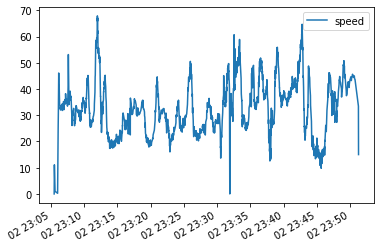

In [14]:
speed_Summary(tt_2016_clean, "Time Trial 2016 Clean")
speed_Summary(tt_2019, "Time Trial 2019")

print ("2016 max speed: " , tt_2016_clean.speed.max())
print ("2016 max speed: " ,tt_2019.speed.max())

tt_2016_clean.speed.plot(kind = "line", y = "speed")
plt.legend()

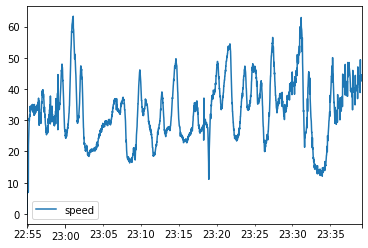

In [15]:
tt_2019.speed.plot(kind = "line",  y = "speed")
plt.legend()

In the 2019 time trial, we can see that the maximum speed reached is 67km/h, whereas in the 2016 time trial the maximum speed was 63km/h. The plots highlight that towards the end of the time trial, in 2016, the speed started to decrease. Whereas in 2019, the rider start to accelerate at the end of the race. 

# Question 4 

## From the elevation_gain field you can see whether the rider is climbing , descending or on the flat. Use this to calculate the average speeds in those three cases (climbing, flat or descending). Note that flat might not be zero elevation_gain but might allow for slight climbs and falls.

In [16]:
def plot_elevation_gain (df, label): 
    print ("elevation gain plot for:", label)
    df.elevation_gain.plot(kind = "line", x = "distance", y = "elevation")


In [17]:
def calc_speed(df): 
    sum_climb = 0
    sum_flat = 0
    sum_dec = 0
    
    count_climb = 0
    count_flat = 0
    count_dec = 0
    
    sum_climb_speed = 0
    sum_flat_speed = 0
    sum_dec_speed = 0

    for i in df.elevation_gain: 
        if i > 0.5: 
            sum_climb+=i
            count_climb+=1
            
            
        elif i < -0.5: 
            sum_dec+=abs(i)
            count_dec+=1
            
        else: 
            sum_flat+=i 
            count_flat+=1

    
    sum_climb = sum_climb/1000
    sum_flat = sum_flat/1000
    sum_dec = sum_dec/1000
    
    print("Sum of climbing elevation in km:" , sum_climb)
    print("Sum of flat elevation in km:" , sum_flat)
    print("Sum of decreasing elevation in km:" , sum_dec)
    print("\n")
    
    print("Sum climbing elevation speed:" , sum_climb_speed)
    print("Sum flat elevation speed:" , sum_flat_speed)
    print("Sum decreasing elevation speed:" , sum_dec_speed)
    print("\n")
    

In [18]:
calc_speed(rr_2016)



Sum of climbing elevation in km: 0.1662000000000001
Sum of flat elevation in km: 0.1571999999999999
Sum of decreasing elevation in km: 0.33400000000000074


Sum climbing elevation speed: 0
Sum flat elevation speed: 0
Sum decreasing elevation speed: 0




elevation gain plot for: Road Race 2016


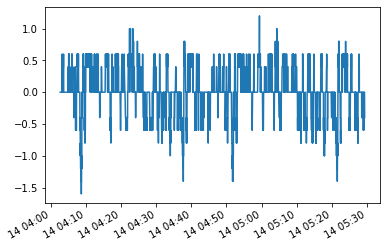

In [19]:
plot_elevation_gain (rr_2016, "Road Race 2016")

elevation gain plot for: Time Trial 2016


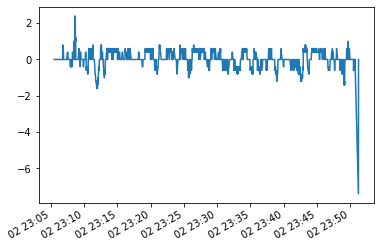

In [20]:
plot_elevation_gain (tt_2016, "Time Trial 2016")

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



